  0%|          | 0/11 [00:00<?, ?it/s]

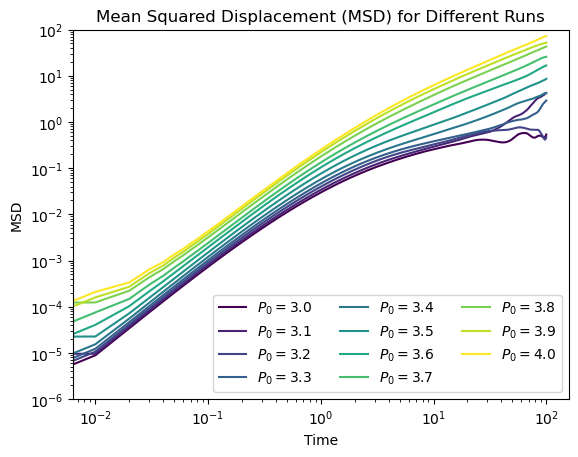

: 

In [ ]:
from simulation.analysis import compute_msd_unwrapped
from matplotlib import pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
runs = ['P_0_3.0', 'P_0_3.1', 'P_0_3.2', 'P_0_3.3', 'P_0_3.4', 'P_0_3.5', 'P_0_3.6', 'P_0_3.7', 'P_0_3.8', 'P_0_3.9', 'P_0_4.0']
# runs = ['P_0_3.4']
dt = 0.01  # Time step
for run in tqdm(runs):
    msd = compute_msd_unwrapped(run, com = True)
    time = np.linspace(0, (len(msd) - 1)*dt, len(msd))
    np.save(f'analysis\{run}_msd.npy', msd)
    np.save('analysis/time.npy', time)
    color = 'blue'  # Use a single color for all runs
    color = plt.cm.viridis(runs.index(run) / (len(runs) - 1))
    
    plt.plot(time, msd, label=r'$P_0 =$'+run[-3:], color=color)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best', ncol=3)
plt.xlabel('Time')
plt.ylabel('MSD')
plt.ylim(1e-6, 1e2)
plt.title('Mean Squared Displacement (MSD) for Different Runs')
plt.show()

c:\Users\Benjamin Laier\Uni\Master Wien\Semester IV\Master Arbeit\tissue_simulation\simulation\analysis.py:137: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if density is not 1:


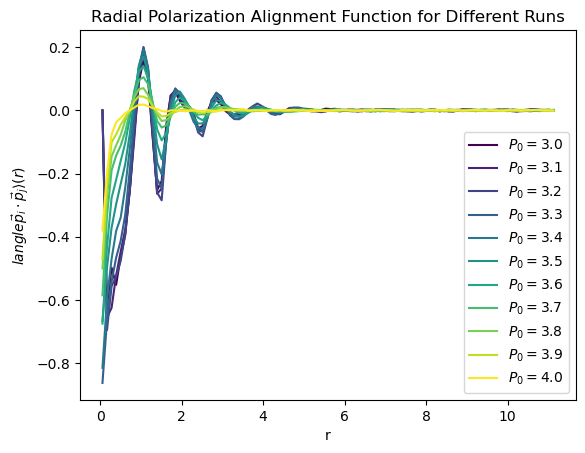

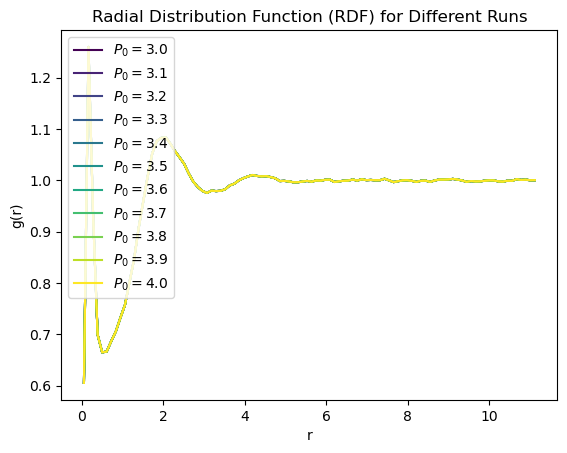

In [1]:
from simulation.analysis import rdf_pol_alignment_avg
from matplotlib import pyplot as plt
import numpy as np
runs = ['P_0_3.0', 'P_0_3.1', 'P_0_3.2', 'P_0_3.3', 'P_0_3.4', 'P_0_3.5', 'P_0_3.6', 'P_0_3.7', 'P_0_3.8', 'P_0_3.9', 'P_0_4.0']
# runs = ['P_0_3.4']
for run in runs:
    bin_centers, avg_alignment_rdf, avg_g_r = rdf_pol_alignment_avg(run, bins=100)
    color = plt.cm.viridis(runs.index(run) / (len(runs) - 1))
    plt.plot(bin_centers, avg_alignment_rdf, label=r'$P_0 =$'+run[-3:], color=color)
plt.legend()
plt.xlabel('r')
plt.ylabel(r'$langle \vec{p}_i \cdot \vec{p}_j \rangle(r)$')
plt.title('Radial Polarization Alignment Function for Different Runs')
plt.show()

# Optionally, plot the RDF as well
for run in runs:
    # bin_centers, avg_alignment_rdf, avg_g_r = rdf_pol_alignment_avg(run, bins=100)
    color = plt.cm.viridis(runs.index(run) / (len(runs) - 1))
    plt.plot(bin_centers, avg_g_r, label=r'$P_0 =$'+run[-3:], color=color)
plt.legend()
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function (RDF) for Different Runs')
plt.show()